In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14

sns.set_style("ticks")
sns.set_context("paper")

In [14]:
df_cdrs = pd.DataFrame({})
for i in range(1,8):
    df = pd.read_csv('sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['datetime'])
    df_cdrs = df_cdrs.append(df)
    
df_cdrs=df_cdrs.fillna(0)
df_cdrs['sms'] = df_cdrs['smsin'] + df_cdrs['smsout']
df_cdrs['calls'] = df_cdrs['callin'] + df_cdrs['callout']
df_cdrs.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,sms,calls
0,2013-11-01,1,0,0.3521,0.0000,0.0000,0.0273,0.0000,0.3521,0.0273
1,2013-11-01,1,33,0.0000,0.0000,0.0000,0.0000,0.0261,0.0000,0.0000
2,2013-11-01,1,39,1.7322,1.1047,0.5919,0.4020,57.7729,2.8369,0.9939
3,2013-11-01,2,0,0.3581,0.0000,0.0000,0.0273,0.0000,0.3581,0.0273
4,2013-11-01,2,33,0.0000,0.0000,0.0000,0.0000,0.0274,0.0000,0.0000


<h2>Internet activity</h2>

In [43]:
df_cdrs_internet = df_cdrs[['datetime', 'CellID', 'internet', 'calls', 'sms']].groupby(['datetime', 'CellID'], as_index=False).sum()
df_cdrs_internet['hour'] = df_cdrs_internet.datetime.dt.hour+24*(df_cdrs_internet.datetime.dt.day-1)
df_cdrs_internet = df_cdrs_internet.set_index(['hour']).sort_index()


In [40]:
df_cdrs_internet

,datetime,CellID,internet,calls,sms
hour,,,,,
0,2013-11-01 00:00:00,1,57.7990,1.0212,3.1890
0,2013-11-01 00:00:00,2,57.9149,1.0402,3.1795
0,2013-11-01 00:00:00,3,58.0382,1.0604,3.1693
0,2013-11-01 00:00:00,4,57.4634,0.9663,3.2166
0,2013-11-01 00:00:00,5,52.1714,0.8850,2.9147
...,...,...,...,...,...
167,2013-11-07 23:00:00,9996,191.2033,4.1136,14.9461
167,2013-11-07 23:00:00,9997,212.2059,4.6225,13.7813
167,2013-11-07 23:00:00,9998,207.8873,4.5127,14.0019


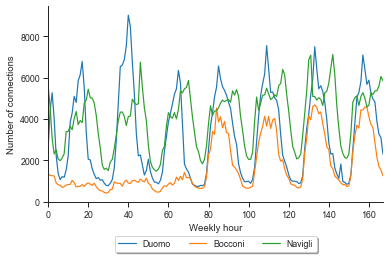

In [49]:
ax = df_cdrs_internet[df_cdrs_internet.CellID==5060]['internet'].plot(label='Duomo')
df_cdrs_internet[df_cdrs_internet.CellID==4259]['internet'].plot(ax=ax, label='Bocconi')
df_cdrs_internet[df_cdrs_internet.CellID==4456]['internet'].plot(ax=ax, label='Navigli')
plt.xlabel("Weekly hour")
plt.ylabel("Number of connections")
sns.despine()

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

<h2>Weekly BoxPlots</h2>

Text(0.5, 0, 'Weekday (0=Monday, 6=Sunday)')

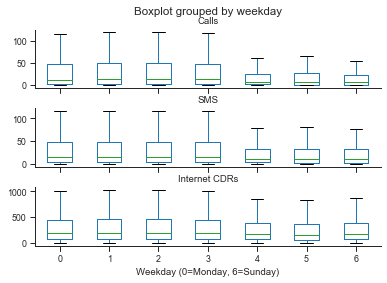

In [47]:
boxplots = {
    'calls': "Calls",
    'sms': "SMS",
    "internet": "Internet CDRs"
}

df_cdrs_internet['weekday'] = df_cdrs_internet.datetime.dt.weekday

f, axs = plt.subplots(len(boxplots.keys()), sharex=True, sharey=False)
f.subplots_adjust(hspace=.35,wspace=0.1)
i = 0
plt.suptitle("")
for k,v in boxplots.items():
    ax = df_cdrs_internet.reset_index().boxplot(column=k, by='weekday', grid=False, sym='', ax =axs[i])
    axs[i].set_title(v)
    axs[i].set_xlabel("")
    sns.despine()
    i += 1
    
plt.xlabel("Weekday (0=Monday, 6=Sunday)")
#f.text(0, 0.5, "Number of events", rotation="vertical", va="center")